<h3 style="font-family: Comic Sans MS; color: #68FF33">Linear Regression exercise</h3>
<strong><span style="color: red">Simple linear regression</span></strong>

In [4]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_test.csv")

total_data = pd.concat([train_data, test_data])
total_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,2.0,43525.0
3,2.2,39891.0
4,2.9,56642.0


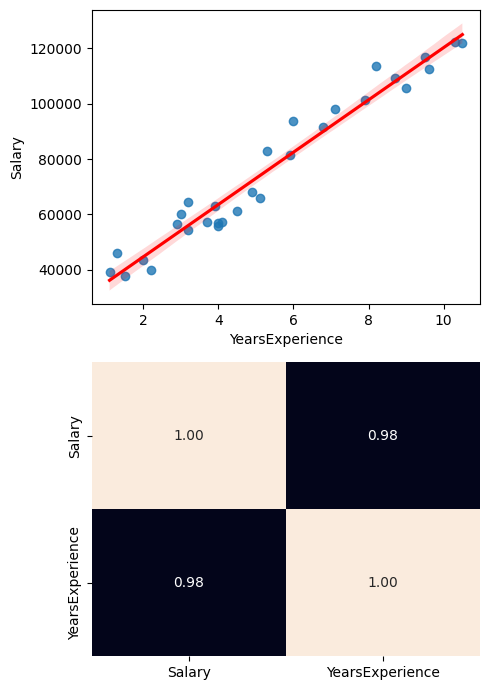

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable
fig, axis = plt.subplots(2, 1, figsize=(5, 7))
sns.regplot(ax=axis[0], data=total_data, x='YearsExperience', y='Salary', line_kws={"color": "red"})
sns.heatmap(total_data[["Salary", "YearsExperience"]].corr(), annot=True, fmt=".2f", ax=axis[1], cbar=False)
plt.tight_layout()
plt.show()

<p style="color: #33FFFC">
There is a clear linear relationship between the predictor variable and the target variable, so it can be easily modeled by this type of model. If the correlation were lower, the model would not have good accuracy. Moreover, since there is only one predictor variable, it is not necessary to apply a normalization. If there were several, it would have to be applied.
</p>

In [9]:
X_train = train_data.drop(columns="Salary") # also can be written as train_data.drop(["Salary"], axis=1)
y_train = train_data["Salary"]
X_test = test_data.drop(columns="Salary")
y_test = test_data["Salary"]

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<p style="color: #33FFFC">
After the training process we can know the parameters (variables <strong><em>a</em></strong> and <strong><em>b</em></strong>) that the molde has fitted:
</p>

In [11]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficient (b): {model.coef_}")

Intercept (a): 26354.430697012212
Coefficient (b): [9277.78307971]


<img src="./simple-lin-reg.png" width="900px" height="450px"/>

In [12]:
y_pred = model.predict(X_test)
y_pred

array([ 40271.10531658,  54187.77993614,  68104.45455571,  89443.35563904,
       102432.25195063, 121915.59641802])

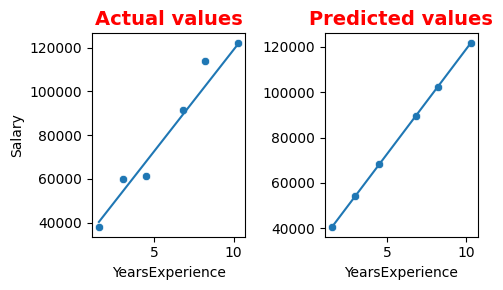

In [17]:
# To compare the predicted value of the original, we can easily perform a comparative plot as follows:
fig, axis = plt.subplots(1, 2, figsize=(5, 3))
# We use the parameters adjusted in the training to draw the regression line in the plots
regression_equation = lambda x: 26354.43069701219 + 9277.78307971 * x # y = a + bx

sns.scatterplot(ax = axis[0], data = test_data, x = "YearsExperience", y = "Salary")
sns.lineplot(ax = axis[0], x = test_data["YearsExperience"], y = regression_equation(test_data["YearsExperience"]))
sns.scatterplot(ax = axis[1], x = test_data["YearsExperience"], y = y_pred)
sns.lineplot(ax = axis[1], x = test_data["YearsExperience"], y = regression_equation(test_data["YearsExperience"])).set(ylabel = None)
# add title to each plot: in left figure "Actual values" and in right figure "Predicted values"
axis[0].set_title("Actual values", fontsize = 14, color = "red", fontweight = "bold")
axis[1].set_title("Predicted values", fontsize = 14, color = "red", fontweight = "bold")
plt.tight_layout()
plt.show()

<p style="color: #33FFFC">
As we can see, the test predicted by the model will always fit the regression equation, since it is the one learned by the model. The figure on the left represents the actual values while those on the right, the predicted ones. <u>We see that some predicted values coincide with the actual values and those that do not have a noticeable difference</u>. We will see next the value of the metric to learn more about the performance of the algorithm. To calculate the effectiveness of the model we will use the mean squared error (MSE) and the coefficient of determination (R-squared), one of the most popular metrics:
</p>

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean squared error: 37649779.45133659
R-squared: 0.959714925174946


<p style="color: #33FFFC">
The lower the RMSE value, the better the model. A perfect model (a hypothetical model that can always predict the exact expected value) would have a value for this metric of 0. We observe that there is a slippage of 37 million, so we could understand that it is very bad.<br> 
<br>Regarding R-squared, the result is a value between 0 and 1 that describes the proportion of variance explained by the model: the closer to 1 this value is, the better the model is fitting the validation data. If we rely on the R-squared value, we observe that it is 95%, a very high value, then 95% of the data are explained by the model, so it is satisfactory.<br>
<br>This type of model cannot be optimized due to the absence of hyperparameters.
</p>
<strong><span style="color: red">Multiple linear regression</span></strong>

In [19]:
train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_weight-height_train.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_weight-height_test.csv")

train_data.head()

,Gender,Height,Weight
0,-1.0,-0.575639,151.275533
1,-1.0,-0.992843,123.965162
2,-1.0,-0.925964,124.765438
3,-1.0,-1.478210,119.195698
4,1.0,-1.598649,146.956646


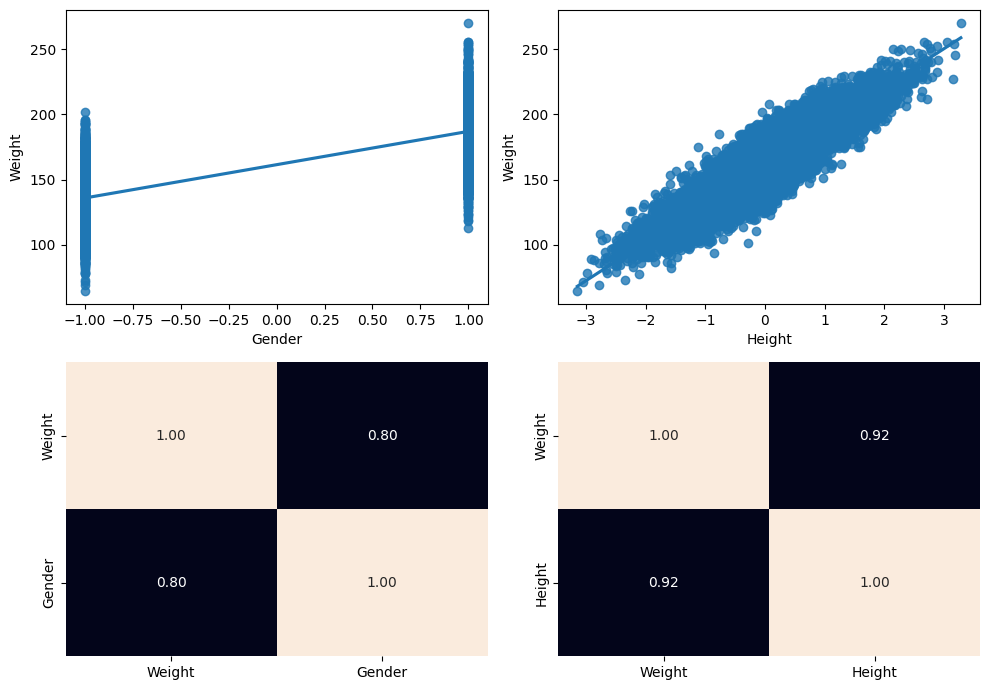

In [20]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0, 0], data = total_data, x = "Gender", y = "Weight")
sns.heatmap(total_data[["Weight", "Gender"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "Height", y = "Weight")
sns.heatmap(total_data[["Weight", "Height"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()

plt.show()

<p style="color: #33FFFC">There is a clear linear relationship between the predictor variable and the target variables, so it can be easily modeled by this type of model. If the correlation were lower, the model would not have good accuracy.</p>

In [21]:
X_train = train_data.drop(columns = "Weight")
y_train = train_data["Weight"]
X_test = test_data.drop(columns = "Weight")
y_test = test_data["Weight"]

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<span style="color: #33FFFC">After the training process we can know the parameters (variables <strong><em>a</em></strong> and <strong><em>b1</em></strong>, <strong><em>b2</em></strong>) that the model has fitted:</span>

In [24]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercept (a): 161.48606316160345
Coefficients (b1, b2): [ 9.65020608 22.88377295]


<img src="./multiple-lin-reg.png" height="400" width="850" />

In [25]:
y_pred = model.predict(X_test)
y_pred

array([105.17851056, 188.29501423, 137.05824216, ..., 112.17172027,
       130.89667195, 137.46475059])

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean squared error: 98.21235363443179
R-squared: 0.9075866115171991


<p style="color: #33FFFC">If we rely on the value of R-squared, we observe that it is 90%, a very high value, then 90% of the data are explained by the model, so it is satisfactory. This type of model cannot be optimized due to the absence of hyperparameters.
</p>